# Mastering Twitter and Instagram with Python



In this notebook we will see how to master data analysis from social networks.

We will use data from **Twitter** and **Instagram**.

## Twitter
Let's see, first of all, how to interact with Twitter through the REST API.

The code you will see is "ready to use", so you can easily use and reuse this notebook with few modifications.

I will use a library, **tweepy**, which will allow us to search for messages that interest us and **pandas** to put our data in quality.

So we don't use the API provided directly by Twitter (it's still possible to do so), but a **wrapper** written and maintained by a community.

In object programming languages, a wrapper is "an object that contains other objects": we build a frame that makes the functions contained in a library available abroad, in an easy way. 

Let's go install everything we need for the lab...

*   tweepy
*   pandas



In [ ]:
!pip install --user tweepy==3.3.0

Let's go import the modules we need for our work:
- numpy
- pandas
- tqdm 
- **tweepy**

In [2]:
import tweepy
import numpy as np
import pandas
from tweepy import OAuthHandler
from tqdm import tqdm_notebook as tqdm 


First, we have to authorize our "app", we use the keys we generated for this purpose.

We need the four values to authenticate with OAuth:
- consumer key
- consumer secret
- access token
- access secret


(specify your **keys**... )

In [3]:
consumer_key = '<consumer_key>'
consumer_secret = '<consumer_secret>'
access_token = '<access_token>'
access_secret = '<access_secret>'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)




The variable **api** is now the starting point for all our operations with **Twitter**.

The **wait_on_rate_limit** parameter enables management of the client-side **rate_limit**. In this way we avoid *being blocked* for too much traffic.


For example, let's read a *Timeline*... let's take the user **Atalanta_BC**
(or the one you prefer)


In [4]:
timeline = api.user_timeline(screen_name = 'Atalanta_BC', count = 10, include_rts = True)
for status in timeline:
    print(status.text)
    print('-----------------------------------------------')

Si riparte! 👊 We're back!

🇮🇹 @SerieA | 25ª giornata
🆚 @SassuoloUS 
🏠 #GewissStadium | #BergAMO
⌚️ #21giugno | 19.3… https://t.co/vANTyi4LCm
-----------------------------------------------
Rafa ha risposto alle vostre domande! 🇧🇷 Tra ripartenza, tapis roulant e... Brudi 😁
Rafa has answered your question… https://t.co/zTDBzDykGv
-----------------------------------------------
Avanti tutta 👊👊👊 Maximum effort

🔗 https://t.co/gIQnUXJHxJ

#GoAtalantaGo ⚫️🔵 https://t.co/vgJKcLbEIT
-----------------------------------------------
Ok, è il momento di sbirciare la soluzione 👀👇
Did you guess it? Check out the solution 🙃

#GoAtalantaGo ⚫️🔵
https://t.co/qEbc65zaRs
-----------------------------------------------
Quando tornano i weekend con l'Atalanta... 🕺🏽🕺🏽

That #FridayFeeling when we're back this weekend! 😎 

#GoAtalantaGo https://t.co/pNFBx7736g
-----------------------------------------------
3️⃣ more days to go!
🦁 L’attesa è quasi finita... -3!

📝 https://t.co/g0SW4bYRN9

#GoAtalantaGo ⚫️🔵 htt

For each status (== tweet) we have the complete Json through the `._json` method.


We introduce a new library *Pretty Print* **pprint**: it is very useful to quickly view the content of a **dict**.

In [5]:
timeline = api.user_timeline(screen_name = 'Atalanta_BC', count = 1, include_rts = True)
import pprint
for status in timeline:
    pprint.pprint(status._json)
    print('-----------------------------------------------')

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 20 10:30:00 +0000 2020',
 'entities': {'hashtags': [{'indices': [70, 84], 'text': 'GewissStadium'},
                           {'indices': [87, 95], 'text': 'BergAMO'},
                           {'indices': [99, 108], 'text': '21giugno'}],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1274288382936580097',
                        'indices': [117, 140],
                        'url': 'https://t.co/vANTyi4LCm'}],
              'user_mentions': [{'id': 1009000960147025921,
                                 'id_str': '1009000960147025921',
                                 'indices': [30, 37],
                                 'name': 'Lega Serie A',
                                 'screen_name': 'SerieA'},
                                {'id': 494931397,
                                 'id_str':

### Search

Let's look for all tweets related to **ponte morandi**
(or you can specify a search to your liking)

We use the bee `.search` which provides these parameters:
- `q` the query string to submit to Twitter
- `count` the status number to return 
- `max_id` returns only tweets that have id greater than `since_id`.

Let's collect 10,000 status and go save them in a list.

In [32]:
query = 'ponte morandi'
searched_tweets = []
last_id = -1
max_tweets = 10000
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=100, max_id=str(last_id - 1))
        # If I've reached the end of the search then I'm done
        # immediately the cycle while
        if not new_tweets:
            break
        # added the data found to the list
        searched_tweets.extend(new_tweets)
        # retrieve the last id found
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        print(e)
        break

In [34]:
len(searched_tweets)

1171

Okay, we have recovery about **1,000** status.

Let's see how we can use them for our analysis. We use, as always, `Pandas`...

Why?
What's a `Pandas`?

### Pandas

Now let's create a dataframe with the tweets we're looking for.

Let's try to extract the most significant information and create a dataset for our analysis.



In [35]:
import pandas as pd
# Create our dict with our data
dict_ = {'id': [], 'user': [], 'date': [], 'text': [], 
         'favorite_count': [], 'hashtags': [], 
         'location': [], 'retweet': [], 'retweet_count': [], 'followers_count': [], 'in_reply_to_status_id':[], 'user_mentions':[]}
#
for status_j in searched_tweets:
    status = status_j._json
    dict_['id'].append(status['id'])
    dict_['user'].append(status['user']['screen_name'])
    dict_['hashtags'].append([hashtag['text'] for hashtag in status['entities']['hashtags']])
    dict_['user_mentions'].append([user_mention['screen_name'] for user_mention in status['entities']['user_mentions']])
    dict_['location'].append(status['user']['location'])
    dict_['followers_count'].append(status['user']['followers_count'])
    dict_['in_reply_to_status_id'].append(status['in_reply_to_status_id'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['retweet_count'].append(status['retweet_count'])
    dict_['retweet'].append(status['retweeted'])


We create the dataframe **pandas** and order it for the *favorite_count* field.
The *.sort_values* method allows you to quickly order the data contained in a **DataFrame** pandas.

In [36]:
df = pd.DataFrame.from_dict(dict_, orient="columns")
df = df.set_index("id")
df.sort_values(by='favorite_count', inplace=True, ascending=False)
df.head(10)

,user,date,text,favorite_count,hashtags,location,retweet,retweet_count,followers_count,in_reply_to_status_id,user_mentions
id,,,,,,,,,,,
1271464788003098624,gladiatoremassi,Fri Jun 12 15:30:02 +0000 2020,#TheTimes consapevole del grande lavoro svolto...,679,"[TheTimes, Toninelli]",Caput Mundi,False,566,6238,NaN,[]
1273495117979103232,guffanti_marco,Thu Jun 18 05:57:51 +0000 2020,"Salvini:《Ma adesso, secondo lei, le pare possi...",217,[],losanna,False,57,11784,NaN,[]
1273526918613270529,Gitro77,Thu Jun 18 08:04:13 +0000 2020,"Andavano espropriati nell'agosto del 2018, dop...",214,[],Rome,False,85,6542,NaN,[]
1272141530292277248,fattoquotidiano,Sun Jun 14 12:19:10 +0000 2020,"Ponte Morandi, il nodo delle celebrazioni per ...",200,[],Roma e Milano,False,65,2014351,NaN,[]
1273987527003836419,UrbanFoxxxx,Fri Jun 19 14:34:30 +0000 2020,The third image above and the first here (by S...,180,[],London,False,27,28227,1.273972e+18,[]
1273951829341229058,Caio45566279,Fri Jun 19 12:12:39 +0000 2020,@DaniloToninelli @Mov5Stelle Del Ponte Morandi...,64,[],,False,10,509,1.273915e+18,"[DaniloToninelli, Mov5Stelle]"
1273653516138164226,ADeborahF,Thu Jun 18 16:27:16 +0000 2020,"Atlantia/Benetton : ""Gli investitori vengono ...",61,[],,False,42,1167,NaN,[]
1271554835020734466,ADeborahF,Fri Jun 12 21:27:51 +0000 2020,I Benetton continuano a sperare di guadagnare ...,37,[],,False,30,1167,NaN,[]
1272797057150005250,ErmannoKilgore,Tue Jun 16 07:44:00 +0000 2020,@GiovanniToti Io non ti ho mai insultato. Tra ...,36,[],Italia,False,9,14919,1.272506e+18,[GiovanniToti]


In [37]:
df.count()

user                     1171
date                     1171
text                     1171
favorite_count           1171
hashtags                 1171
location                 1171
retweet                  1171
retweet_count            1171
followers_count          1171
in_reply_to_status_id     117
user_mentions            1171
dtype: int64



We save the dataset thus obtained so that it can also be handled with other tools (e.g. **Talend**).



In [38]:
df.to_csv('sc_twitter.csv')

### Hashtag analysis

Let's go pull out the hashtags and try to put them on a list.

In [ ]:
list_hashtag_strings = []
for entry in df.hashtags:
    for hashtag in entry:
        list_hashtag_strings.append(hashtag.strip().lower().replace(' ',','))
list_hashtag_strings

Let's group the hashtags, move them to a DataFrame and count them by looking for the most common ones.

To do this we use the `groupby` method of pandas.

In [40]:
hashtag = pd.DataFrame(list_hashtag_strings)
hashtag.columns = ['hashtag']
df_hashtag = hashtag.groupby(['hashtag'])['hashtag'].count().sort_values(ascending=False)
df_hashtag.head(20)


hashtag
toninelli            536
thetimes             536
iostoconglionesti      5
morandi                5
atlantia               4
italiashock            4
renzi                  4
genova                 3
ciliegie               2
portodigenova          2
conte                  2
salvini                2
statigenerali          2
italia                 2
cdx                    1
genovanelcuore         1
crollo                 1
europa                 1
zaia                   1
modellogenova          1
Name: hashtag, dtype: int64

We save the results in two files
- the first file will contain the hashtag list
- the second file will contain the relationship between status and hashtag

In [41]:
df_hashtag.to_csv('sc_hashtag.csv', header=True)

In [42]:
status_hashtag = []
for status_id, entry in df.iterrows():
    for hashtag in entry['hashtags']:
        status_hashtag.append({'id': status_id, 'hashtag': hashtag.strip().lower()})

In [43]:
df_status_hashtag = pd.DataFrame(status_hashtag)
df_status_hashtag.set_index(['id','hashtag'])
df_status_hashtag.to_csv('sc_hashtag_status.csv', header=True)

### Wordcloud

Let's try some visualization libraries in **Python**.
One of the most used (and perhaps least useful) ways to display text is WordCloud.

Let's install the `wordcloud` library.

In [ ]:
!pip install --user wordcloud
!pip install --user matplotlib

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

We create a list of hashtags by concatenating all the elements of the original list and separating them with a space.

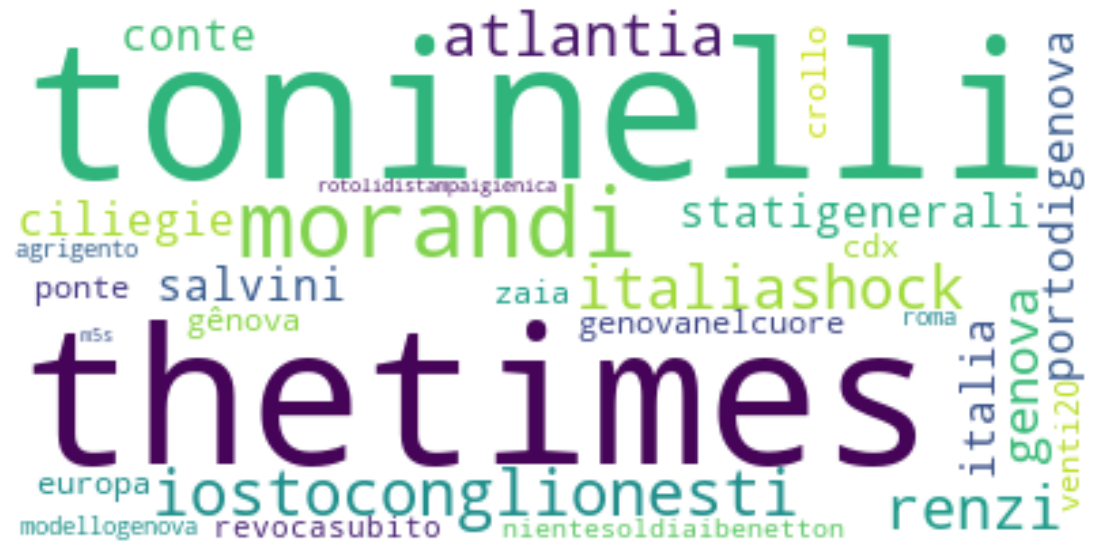

In [46]:
all_hashtags = ' '.join(list_hashtag_strings)
wordcloud = WordCloud(max_font_size=70, max_words=30, 
                      background_color="white", 
                      collocations=False).generate(all_hashtags)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Locations 



In [47]:
counts = df.groupby('location').size()  
df_location = pd.DataFrame(counts, columns = ['size'])    

# we only keep significant cases
df_location = df_location[df_location['size']>3] 
df_location = df_location.sort_values(by='size', ascending=False)
df_location.head(10)

,size
location,
,613
Italia,41
"Roma, Lazio",35
"Milano, Lombardia",14
Italy,12
Roma,8
"Genova, Liguria",7
"Torino, Piemonte",7
"Sardegna, Italia",6


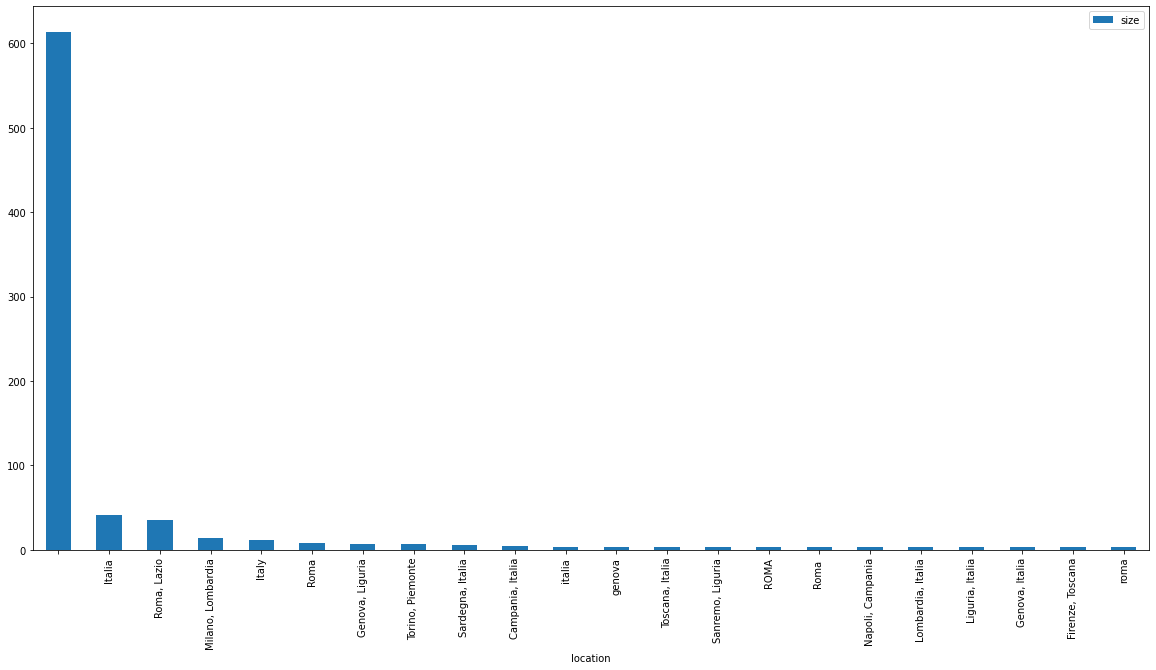

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
df_location.plot(kind='bar')

### Users

We use the same technique to analyze the **users**.

In [49]:
counts = df.groupby('user').size()  
df_user = pd.DataFrame(counts, columns = ['size'])    

df_user = df_user[df_user['size']>3] 
df_user = df_user.sort_values(by='size', ascending=False)
df_user.head(10)

,size
user,
ADeborahF,8
AntonioDeCurt19,7
GeaPilato,5
Giancar70336148,5
marino29b,5
sergimagugliani,5
Jenni79430950,4
gjscco,4


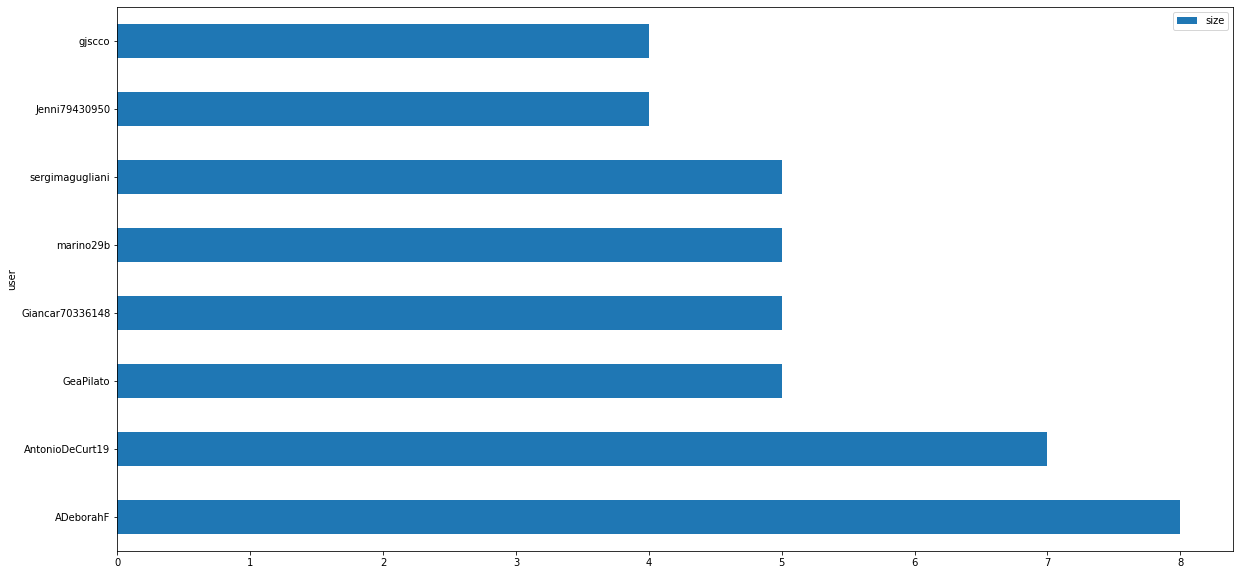

In [50]:
df_user.plot(kind='barh')

### User Mentions



In [ ]:
list_mentions = []
for entry in df.user_mentions:
    for mention in entry:
        list_mentions.append(mention)
list_mentions

In [52]:
mentions = pd.DataFrame(list_mentions)
mentions.columns = ['user']
mentions = mentions.groupby('user')['user'].count()
mentions.head()

user
248455           1
3gennaio2013     1
4everAnnina      1
ADeborahF       67
ADnl             1
Name: user, dtype: int64

In [53]:
df_mentions = pd.DataFrame(mentions)    
df_mentions.head()

df_mentions.columns = ['count']
df_mentions = df_mentions[df_mentions['count']>=15] 
df_mentions = df_mentions.sort_values(by='count', ascending=False)
df_mentions.head(10)


,count
user,
gladiatoremassi,535
Gitro77,70
ADeborahF,67
guffanti_marco,54
fattoquotidiano,53
paola_demicheli,29
BiwiMobu,28
ErmannoKilgore,27
DaniloToninelli,26


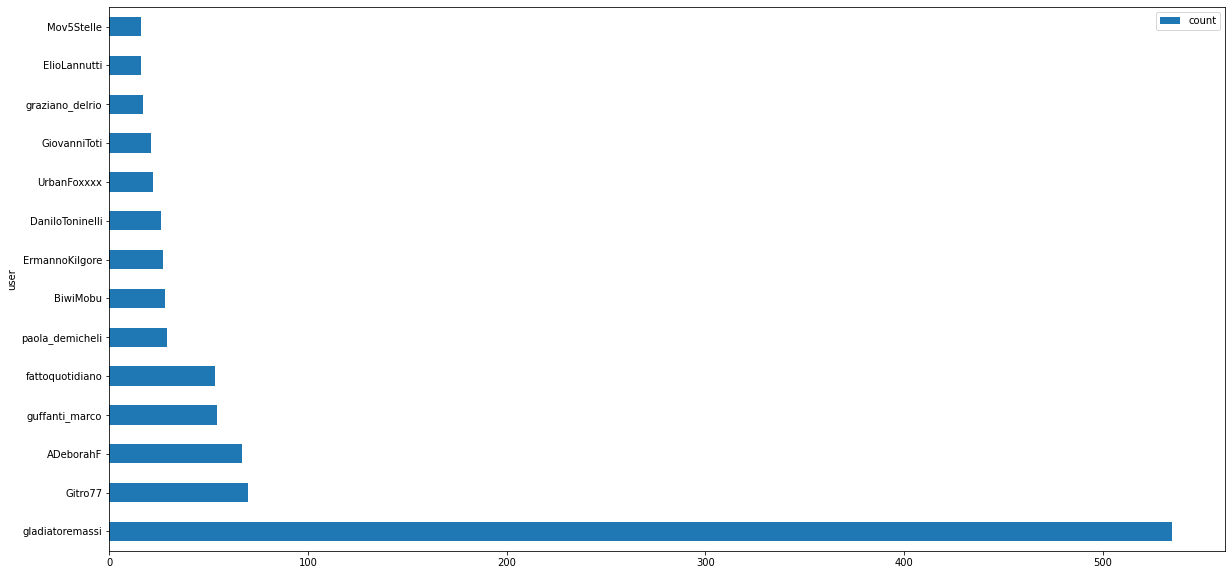

In [54]:
df_mentions.plot(kind='barh')

## GetOldTweets3

What do you notice in the tweets?

The bees only give us recent history....

What if I want to retrieve tweets from the past?

`GetOldTweets3` allows us to download states published in the past:
https://pypi.org/project/GetOldTweets3/

To install the library:
`pip install GetOldTweets3`

In [1]:
!pip install GetOldTweets3

First we try to run the same query we did (morandi bridge), framing a different historical period (August 2018).


In [2]:
import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('ponte morandi')\
                                           .setSince("2018-08-10")\
                                           .setUntil("2018-08-31")\
                                           .setMaxTweets(1)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)[0]
print(tweet.text)

Salvini non ha commesso nessun reato.Giusto quello che ha detto,oltretutto con la Diciotti hanno spostato l'attenzione dei media dal ponte Morandi si sentono in colpa? dato che nel 2016 Delrio non ha ascoltato Maurizio Rossi di Scelta Civica che lo aveva avvisato del pericolo?


Okay, it seems to be working!
Let's widen the search! Let's limit it to 1,000 tweets....



In [59]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('ponte morandi')\
                                           .setSince("2018-08-10")\
                                           .setUntil("2018-08-31")\
                                           .setMaxTweets(1000)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
print(len(tweets))

1000


We will save the results in a pandas dataframe

Tweet GetOldTweets3 model contanis these attribures:
- id (str)
- permalink (str)
- username (str)
- to (str)
- text (str)
- date (datetime) in UTC
- retweets (int)
- favorites (int)
- mentions (str)
- hashtags (str)
- geo (str)

In [90]:
import pandas as pd
# Create our dict with our data
dict_ = {'id': [], 'user': [], 'date': [], 'text': [], 
         'favorite_count': [], 'hashtags': [], 
         'location': [], 'retweet': [], 'retweet_count': [], 'user_mentions':[]}
#
for status in tweets:
    dict_['id'].append(status.id)
    dict_['user'].append(status.username)
    dict_['hashtags'].append(",".join(list(status.hashtags.split(' '))))
    dict_['user_mentions'].append(",".join(list(status.mentions.split(' '))))
    dict_['date'].append(status.date)
    dict_['location'].append(status.geo)
    dict_['text'].append(status.text)
    dict_['favorite_count'].append(status.favorites)
    dict_['retweet_count'].append(status.retweets)
    dict_['retweet'].append(status.replies)

In [ ]:
df = pd.DataFrame.from_dict(dict_, orient="columns")
df = df.set_index("id")
df.sort_values(by='favorite_count', inplace=True, ascending=False)
df.to_csv('sc_twitter_history.csv')
df.head(10)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1035119099200921600 to 1035099353835347968
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   user            1000 non-null   object             
 1   date            1000 non-null   datetime64[ns, UTC]
 2   text            1000 non-null   object             
 3   favorite_count  1000 non-null   int64              
 4   hashtags        1000 non-null   object             
 5   location        1000 non-null   object             
 6   retweet         1000 non-null   int64              
 7   retweet_count   1000 non-null   int64              
 8   user_mentions   1000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 78.1+ KB


In [ ]:
list_hashtag_strings = []
for id, entry in df.iterrows():
  list_hashtag_strings.extend(entry['hashtags'].split(","))
print(list_hashtag_strings)

In [101]:
hashtag = pd.DataFrame(list_hashtag_strings)
hashtag.columns = ['hashtag']
df_hashtag = hashtag.groupby(['hashtag'])['hashtag'].count().sort_values(ascending=False)
df_hashtag.head(20)

hashtag
                 596
#PonteMorandi    218
#Genova           98
#pontemorandi     44
#Morandi          37
#ponteMorandi     37
#Autostrade       28
#genova           23
#Ponte            20
#inonda           17
#Salvini          14
#ponte            13
#RenzoPiano       13
#autostrade       11
#Genovaponte      11
#Toninelli         9
#Toti              9
#Diciotti          9
#DiMaio            8
#ponteGenova       8
Name: hashtag, dtype: int64

In [102]:
df_hashtag.to_csv('sc_hashtag_hist.csv', header=True)

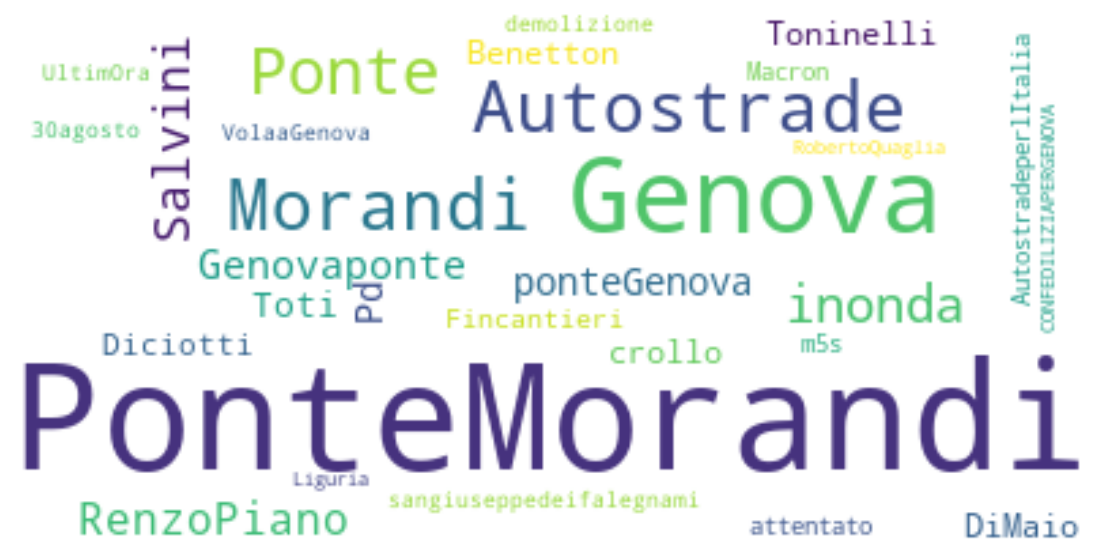

In [103]:
all_hashtags = ' '.join(list_hashtag_strings)
wordcloud = WordCloud(max_font_size=70, max_words=30, 
                      background_color="white", 
                      collocations=False).generate(all_hashtags)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Instagram


Let's see what you can do with Instagram.
There are several libraries but they are all very experimental. Something can still be done.

Let's try using **instaloader**.

In [3]:
!pip3 install instaloader

In [4]:
from itertools import islice
from math import ceil

import instaloader

To download the profile of a user, from command line



```
instaloader profile esselunga
```



(found at this link https://instaloader.github.io/basic-usage.html 
all documentation for command line execution)


```
instaloader profile [profile....]

```
To create a corpus of images:

instaloader --no-videos --no-metadata-json --no-captions "#running"


I am now looking for all the posts with the hashtag **unimib** of June 2020.
I use `dropwhile` and `takewhile` that allow me to easily filter the data.

In [ ]:
from datetime import datetime
from itertools import dropwhile, takewhile

L = instaloader.Instaloader()
posts = L.get_hashtag_posts('unimib')

SINCE = datetime(2020, 6, 30)
UNTIL = datetime(2020, 6, 1)

for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post.date)
    L.download_post(post, '#unimib')

I find all the data in the folder **#unimib** under the directory of my notebook

Let's now try to understand who are the most active and the least active followers of an Instagram account (let's take the month of May)

In [ ]:

PROFILE = 'unimib'

profile = instaloader.Profile.from_username(L.context, PROFILE)

SINCE = datetime(2020, 6, 30)
UNTIL = datetime(2020, 6, 1)

likes = set()
print('Fetching likes of all posts of profile {}.'.format(profile.username))
posts = profile.get_posts()
for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post)
    likes = likes | set(post.get_likes())


Fetching likes of all posts of profile unimib.
<Post CBm2r0Lops9>


In [ ]:
likes

In [ ]:
SINCE = datetime(2020, 5, 31)
UNTIL = datetime(2020, 5, 1)

likes_5 = set()
print('Fetching likes of all posts of profile {}.'.format(profile.username))
posts = profile.get_posts()
for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post)
    likes_5 = likes_5 | set(post.get_likes())


In [ ]:
likes_5

In [ ]:
ghosts = likes_5 - likes

In [ ]:
ghosts

new users?

In [ ]:
new = likes - likes_5

In [ ]:
new

In [ ]:
list_new = []
for profile in new:
    list_new.append({'profile': profile.username})

In [ ]:
list_ghost = []
for profile in ghosts:
    list_ghost.append({'profile': profile.username})

In [ ]:
pd.DataFrame(list_new).to_csv('new.csv')
pd.DataFrame(list_ghost).to_csv('ghost.csv')